In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
file_path = "data.csv"
df = pd.read_csv(file_path)

/tmp/ipykernel_93697/333534303.py:3: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,26,27,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
# Ensure all years are correctly captured
print("Unique FIRE_YEAR in the original dataset:", df['FIRE_YEAR'].unique())

Unique FIRE_YEAR in the original dataset: [2005 2004 2006 2008 2002 2007 2009 2001 2003 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020]


In [ ]:
df.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   OBJECTID                       int64  
 1   Shape                          object 
 2   FOD_ID                         int64  
 3   FPA_ID                         object 
 4   SOURCE_SYSTEM_TYPE             object 
 5   SOURCE_SYSTEM                  object 
 6   NWCG_REPORTING_AGENCY          object 
 7   NWCG_REPORTING_UNIT_ID         object 
 8   NWCG_REPORTING_UNIT_NAME       object 
 9   SOURCE_REPORTING_UNIT          object 
 10  SOURCE_REPORTING_UNIT_NAME     object 
 11  LOCAL_FIRE_REPORT_ID           object 
 12  LOCAL_INCIDENT_ID              object 
 13  FIRE_CODE                      object 
 14  FIRE_NAME                      object 
 15  ICS_209_PLUS_INCIDENT_JOIN_ID  object 
 16  ICS_209_PLUS_COMPLEX_JOIN_ID   object 
 17  MTBS_ID                        object 
 18  MT

**Step 1:  Data Cleaning, Preprocessing, and Transformation**

**Check for Missing Values:** Identified columns with missing values to decide on imputation or removal.

**Date Conversion:** Transformed DISCOVERY_DATE and CONT_DATE to datetime format.

**Feature Extraction:** Extracted useful features from the date columns:
    DISCOVERY_YEAR: Year of discovery.
    DISCOVERY_MONTH: Month of discovery.
    DISCOVERY_SEASON: Season of discovery (Winter, Spring, Summer, Fall).
    FIRE_DURATION: Duration of fires in days.

**Drop Irrelevant Columns:** Removed unnecessary columns like Shape, FPA_ID, and others that don’t contribute to analysis.
    **Shape:** Likely contains geometric shapes or metadata not useful for analysis.
    **FPA_ID:** A unique identifier for fires, but not relevant for patterns or insights.
    **LOCAL_FIRE_REPORT_ID:** Local report ID, redundant for global analysis.
    **MTBS_ID:** ID related to a specific program (Monitoring Trends in Burn Severity), likely unnecessary for general analysis.
    **ICS_209_PLUS_INCIDENT_JOIN_ID:** A technical identifier, likely redundant.

**Reason for Dropping:** These columns are either identifiers, metadata, or contain information irrelevant to analysis goals like clustering, classification, or pattern mining. Dropping such columns reduces dataset size and focuses on meaningful features.

**Preview Cleaned Data:** Ensured that the data is cleaned and ready for further steps.


In [ ]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing Values:\n", missing_data[missing_data > 0])

# Convert DISCOVERY_DATE and CONT_DATE to datetime format
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'], errors='coerce')
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'], errors='coerce')

# Extract year and month from DISCOVERY_DATE
df['DISCOVERY_YEAR'] = df['DISCOVERY_DATE'].dt.year
df['DISCOVERY_MONTH'] = df['DISCOVERY_DATE'].dt.month

#  function to map months to seasons by name
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Apply the function to create a 'DISCOVERY_SEASON' column
df['DISCOVERY_SEASON'] = df['DISCOVERY_MONTH'].apply(get_season)

# Calculate duration of fires in days
df['FIRE_DURATION'] = (df['CONT_DATE'] - df['DISCOVERY_DATE']).dt.days

# Droping columns that may not be useful for analysis
columns_to_drop = ['Shape', 'FPA_ID', 'LOCAL_FIRE_REPORT_ID', 'MTBS_ID', 'ICS_209_PLUS_INCIDENT_JOIN_ID']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

print("\nCleaned Data Preview:")
df_cleaned.head()


Missing Values:
 LOCAL_FIRE_REPORT_ID             1825891
LOCAL_INCIDENT_ID                 744411
FIRE_CODE                        1906254
FIRE_NAME                         995415
ICS_209_PLUS_INCIDENT_JOIN_ID    2270072
ICS_209_PLUS_COMPLEX_JOIN_ID     2298627
MTBS_ID                          2289696
MTBS_FIRE_NAME                   2289696
COMPLEX_NAME                     2297619
DISCOVERY_TIME                    789095
NWCG_CAUSE_AGE_CATEGORY          2228039
CONT_DATE                         894813
CONT_DOY                          894813
CONT_TIME                         990880
COUNTY                            665779
FIPS_CODE                         665779
FIPS_NAME                         665780
dtype: int64

Cleaned Data Preview:


,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,...,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_YEAR,DISCOVERY_MONTH,DISCOVERY_SEASON,FIRE_DURATION
0,1,1,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,PNF-47,...,-121.005833,USFS,CA,63.0,6063.0,Plumas County,2005,2,Winter,0.0
1,2,2,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,...,-120.404444,USFS,CA,61.0,6061.0,Placer County,2004,5,Spring,0.0
2,3,3,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,021,...,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County,2004,5,Spring,0.0
3,4,4,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,6,...,-119.913333,USFS,CA,3.0,6003.0,Alpine County,2004,6,Summer,5.0
4,5,5,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,7,...,-119.933056,USFS,CA,3.0,6003.0,Alpine County,2004,6,Summer,5.0


In [ ]:
# Check for missing values
missing_data = df.isnull().sum()
print("\nMissing Values (Original Dataset):\n", missing_data[missing_data > 0])


Missing Values (Original Dataset):
 LOCAL_FIRE_REPORT_ID             1825891
LOCAL_INCIDENT_ID                 744411
FIRE_CODE                        1906254
FIRE_NAME                         995415
ICS_209_PLUS_INCIDENT_JOIN_ID    2270072
ICS_209_PLUS_COMPLEX_JOIN_ID     2298627
MTBS_ID                          2289696
MTBS_FIRE_NAME                   2289696
COMPLEX_NAME                     2297619
DISCOVERY_TIME                    789095
NWCG_CAUSE_AGE_CATEGORY          2228039
CONT_DATE                         894813
CONT_DOY                          894813
CONT_TIME                         990880
COUNTY                            665779
FIPS_CODE                         665779
FIPS_NAME                         665780
dtype: int64


In [ ]:
# Convert DISCOVERY_DATE and CONT_DATE to datetime format
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'], errors='coerce')
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'], errors='coerce')

In [ ]:
# Recalculate FIRE_YEAR directly from DISCOVERY_DATE to ensure accuracy
df['FIRE_YEAR'] = df['DISCOVERY_DATE'].dt.year

# Extract month from DISCOVERY_DATE
df['DISCOVERY_MONTH'] = df['DISCOVERY_DATE'].dt.month

# Function to map months to seasons by name
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Apply the function to create a DISCOVERY_SEASON column
df['DISCOVERY_SEASON'] = df['DISCOVERY_MONTH'].apply(get_season)

# Calculate duration of fires in days
df['FIRE_DURATION'] = (df['CONT_DATE'] - df['DISCOVERY_DATE']).dt.days

# Fill missing FIRE_YEAR with a placeholder if DISCOVERY_DATE is missing
df['FIRE_YEAR'] = df['FIRE_YEAR'].fillna(-1).astype(int)  # Use -1 as a placeholder


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 38 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   OBJECTID                      int64         
 1   FOD_ID                        int64         
 2   SOURCE_SYSTEM_TYPE            object        
 3   SOURCE_SYSTEM                 object        
 4   NWCG_REPORTING_AGENCY         object        
 5   NWCG_REPORTING_UNIT_ID        object        
 6   NWCG_REPORTING_UNIT_NAME      object        
 7   SOURCE_REPORTING_UNIT         object        
 8   SOURCE_REPORTING_UNIT_NAME    object        
 9   LOCAL_INCIDENT_ID             object        
 10  FIRE_CODE                     object        
 11  FIRE_NAME                     object        
 12  ICS_209_PLUS_COMPLEX_JOIN_ID  object        
 13  MTBS_FIRE_NAME                object        
 14  COMPLEX_NAME                  object        
 15  FIRE_YEAR                     in

Numerical Columns: Missing values are filled with the mean of each column.
    Columns like FIRE_DURATION, DISCOVERY_TIME, etc.

Categorical Columns: Missing values are replaced with "Unknown".
    Columns like NWCG_CAUSE_CLASSIFICATION, STATE, etc.

Date Columns: Missing values are filled with a placeholder date (e.g., 1992-01-01).
    Columns like DISCOVERY_DATE, CONT_DATE.

Special Columns: Use appropriate imputation (e.g., FIPS_CODE is filled with its median).

In [ ]:
# Drop columns that may not be useful for analysis
columns_to_drop = ['Shape', 'FPA_ID', 'LOCAL_FIRE_REPORT_ID', 'MTBS_ID', 'ICS_209_PLUS_INCIDENT_JOIN_ID']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values
# 1. Numerical Columns: Fill missing values with the mean
numerical_cols_cleaned = ['FIRE_DURATION', 'DISCOVERY_TIME', 'CONT_TIME', 'FIRE_SIZE']
for col in numerical_cols_cleaned:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

# 2. Categorical Columns: Fill missing values with "Unknown"
categorical_cols_cleaned = [
    'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
    'NWCG_CAUSE_AGE_CATEGORY', 'OWNER_DESCR', 'STATE', 'COUNTY'
]
for col in categorical_cols_cleaned:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].fillna('Unknown')

# Verify no rows were dropped inadvertently
print("\nRow count before cleaning:", len(df))
print("Row count after cleaning:", len(df_cleaned))

# Ensure FIRE_YEAR is not missing any expected years
print("Unique FIRE_YEAR after cleaning:", df_cleaned['FIRE_YEAR'].unique())

# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv("cleaned_wildfire_dataset.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_wildfire_dataset.csv'.")

# Reload to verify
data = pd.read_csv("cleaned_wildfire_dataset.csv")
print("Unique FIRE_YEAR in reloaded data:", data['FIRE_YEAR'].unique())


Row count before cleaning: 2303566
Row count after cleaning: 2303566
Unique FIRE_YEAR after cleaning: [2005 2004 2006 2008 2002 2007 2009 2001 2003 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020]

Cleaned dataset saved as 'cleaned_wildfire_dataset.csv'.


/tmp/ipykernel_93697/1937152268.py:33: DtypeWarning: Columns (7,9,10,11,12,13,14,22,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("cleaned_wildfire_dataset.csv")


Unique FIRE_YEAR in reloaded data: [2005 2004 2006 2008 2002 2007 2009 2001 2003 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020]


In [14]:
data = pd.read_csv('/content/drive/MyDrive/DM_Project/cleaned_wildfire_dataset.csv')

<ipython-input-14-9781d2844a9f>:1: DtypeWarning: Columns (7,9,10,11,12,13,14,22,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/DM_Project/cleaned_wildfire_dataset.csv')


In [ ]:
data.head()

,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,...,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_SEASON,FIRE_DURATION
0,1,1,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,PNF-47,...,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County,2,Winter,0.0
1,2,2,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,...,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County,5,Spring,0.0
2,3,3,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,021,...,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County,5,Spring,0.0
3,4,4,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,6,...,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County,6,Summer,5.0
4,5,5,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,7,...,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County,6,Summer,5.0


In [ ]:
data.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,FIPS_CODE,DISCOVERY_MONTH,FIRE_DURATION
count,2.303566e+06,2.303566e+06,2.303566e+06,2.303566e+06,2.303566e+06,1.408753e+06,2.303566e+06,2.303566e+06,2.303566e+06,2.303566e+06,1.637787e+06,2.303566e+06,2.303566e+06
mean,1.151784e+06,1.185100e+08,2.006167e+03,1.659714e+02,1.445252e+03,1.707579e+02,1.523731e+03,7.816088e+01,3.696623e+01,-9.635792e+01,2.741364e+04,5.970532e+00,9.241024e-01
std,6.649824e+05,1.621564e+08,8.044358e+00,8.975278e+01,3.448999e+02,8.626373e+01,3.367530e+02,2.630832e+03,6.008260e+00,1.664360e+01,1.694484e+04,2.945058e+00,5.029829e+00
min,1.000000e+00,1.000000e+00,1.992000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e-05,1.793972e+01,-1.788026e+02,1.001000e+03,1.000000e+00,0.000000e+00
25%,5.758922e+05,6.225492e+05,2.000000e+03,9.100000e+01,1.356000e+03,9.900000e+01,1.515000e+03,1.000000e-01,3.301390e+01,-1.110361e+02,1.210100e+04,4.000000e+00,0.000000e+00
50%,1.151784e+06,1.403630e+06,2.006000e+03,1.660000e+02,1.445252e+03,1.760000e+02,1.523731e+03,8.000000e-01,3.572250e+01,-9.347009e+01,2.808500e+04,6.000000e+00,0.000000e+00
75%,1.727675e+06,3.000071e+08,2.013000e+03,2.310000e+02,1.557000e+03,2.320000e+02,1.626000e+03,3.000000e+00,4.089029e+01,-8.251000e+01,4.500100e+04,8.000000e+00,9.241024e-01
max,2.303566e+06,4.007330e+08,2.020000e+03,3.660000e+02,2.359000e+03,3.660000e+02,2.359000e+03,6.627000e+05,7.033060e+01,-6.525694e+01,7.214700e+04,1.200000e+01,3.640000e+02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 37 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   OBJECTID                      int64  
 1   FOD_ID                        int64  
 2   SOURCE_SYSTEM_TYPE            object 
 3   SOURCE_SYSTEM                 object 
 4   NWCG_REPORTING_AGENCY         object 
 5   NWCG_REPORTING_UNIT_ID        object 
 6   NWCG_REPORTING_UNIT_NAME      object 
 7   SOURCE_REPORTING_UNIT         object 
 8   SOURCE_REPORTING_UNIT_NAME    object 
 9   LOCAL_INCIDENT_ID             object 
 10  FIRE_CODE                     object 
 11  FIRE_NAME                     object 
 12  ICS_209_PLUS_COMPLEX_JOIN_ID  object 
 13  MTBS_FIRE_NAME                object 
 14  COMPLEX_NAME                  object 
 15  FIRE_YEAR                     int64  
 16  DISCOVERY_DATE                object 
 17  DISCOVERY_DOY                 int64  
 18  DISCOVERY_TIME        

In [ ]:
data['FIRE_YEAR'].unique()

array([2005, 2004, 2006, 2008, 2002, 2007, 2009, 2001, 2003, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

Step 2: Dimensionality Reduction
Objectives:
Reduce dataset dimensions while retaining the most significant features.
Use techniques like PCA (Principal Component Analysis) to identify and retain features that explain most of the variance in the data.
Approach:
Prepare Data for Dimensionality Reduction:

Select only numerical columns for PCA (categorical data is not suitable for PCA).
Normalize or standardize the data to ensure all features contribute equally.
Apply PCA:

Use PCA to reduce dimensions while retaining the maximum variance.
Visualize the explained variance ratio to decide on the number of components to keep.
Transform the Data:

Use the selected principal components to create a reduced dataset.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np

Remaining NaN values:
 0


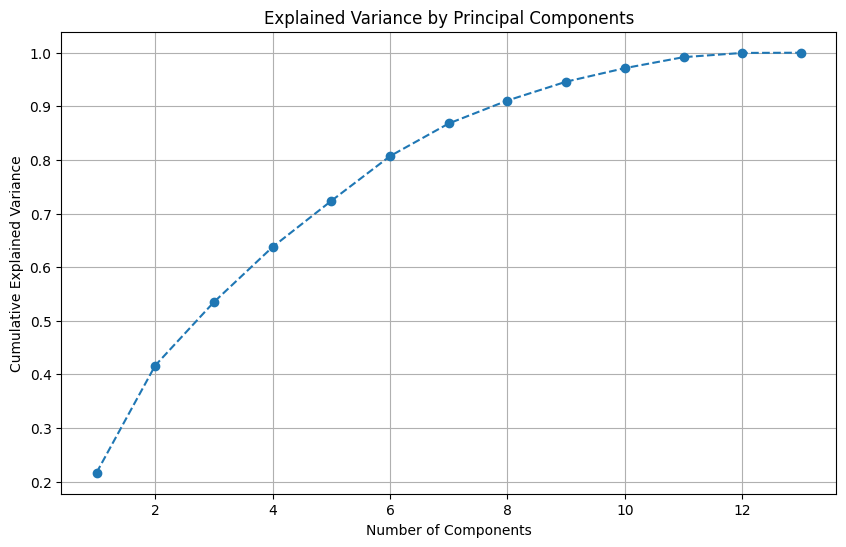

In [ ]:
# Step 1: Handle missing values in numerical data
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='mean')  # Replace NaNs with mean
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])

# Step 2: Handle missing values in categorical data
categorical_cols = data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='constant', fill_value='Unknown')  # Replace NaNs with 'Unknown'
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

# Step 3: Verify if any NaNs remain
print("Remaining NaN values:\n", data.isnull().sum().sum())  # Should print 0

# Step 4: Proceed with PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select only numerical data for PCA
numerical_data = data[numerical_cols]

# Standardize the data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(numerical_data_scaled)

# Visualize explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_.cumsum(),
    marker='o', linestyle='--'
)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [ ]:
# Decide on the number of components to retain (e.g., 95% variance)
n_components = sum(pca.explained_variance_ratio_.cumsum() <= 0.95)
print(f"Number of components to retain 95% variance: {n_components}")

# Reduce Dimensions
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(numerical_data_scaled)

# Create a DataFrame for reduced data
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])
print("Reduced DataFrame Preview:")
print(reduced_df.head())

Number of components to retain 95% variance: 9
Reduced DataFrame Preview:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.925914 -1.725130 -0.274847  1.270550 -0.455692 -2.535415 -0.326844   
1  0.068074 -1.514565 -1.439852  0.506647 -0.526773 -2.081273 -0.360303   
2  0.150041 -1.508985  1.782292  0.800017 -0.810290 -2.175316 -0.126415   
3  0.919315 -1.374280 -0.191096  0.916451 -1.080317 -1.615225  0.598051   
4  0.941136 -1.365138 -0.607410  0.892808 -1.046908 -1.576661  0.621723   

        PC8       PC9  
0 -0.216755 -0.648705  
1 -0.285204 -1.150732  
2 -0.129682 -0.010781  
3  0.021084  0.528652  
4  0.094752  0.940044  


The PCA results show that 9 components are sufficient to retain 95% of the variance in your dataset. This is a significant reduction from the original number of features, making the dataset more manageable while preserving most of the important information.

In [ ]:
reduced_df.to_csv("reduced_wildfire_dataset.csv", index=False)
print("Reduced dataset saved as 'reduced_wildfire_dataset.csv'.")

Reduced dataset saved as 'reduced_wildfire_dataset.csv'.


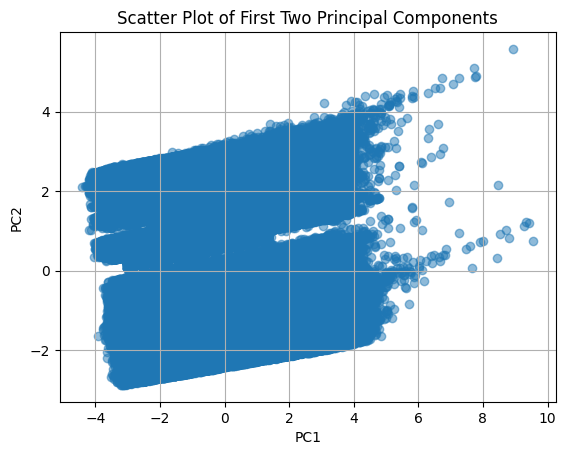

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(reduced_df['PC1'], reduced_df['PC2'], alpha=0.5)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

Scatter plot of the first two principal components looks quite dense, which might indicate that the data points are closely packed or there are many overlapping data points in the lower dimensions. This is common with large datasets.

In [ ]:
from sklearn.cluster import KMeans

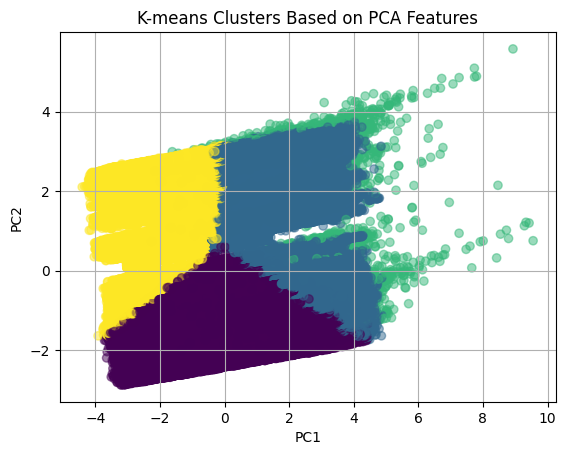

In [ ]:
# Perform K-means clustering on the reduced data
kmeans = KMeans(n_clusters=4, random_state=42)  # Replace 4 with the desired number of clusters
clusters = kmeans.fit_predict(reduced_df)

# Add cluster labels to the dataset
reduced_df['Cluster'] = clusters

# Visualize clusters (using PC1 and PC2 for simplicity)
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-means Clusters Based on PCA Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

Scatter Plot of First Two Principal Components (PCA):
Purpose: Visualizes how the clusters are distributed in the reduced 2D space.
Observation:
Clusters are well-separated in 2D PCA space, but there is overlap, particularly between clusters 1 and 3.
Cluster 2 appears to contain the least number of samples, consistent with the bar chart.

Cluster Separation in 2D PCA Space:

The clusters are fairly well-separated based on PC1 and PC2.
Cluster 0 (purple) and Cluster 1 (blue) dominate the left and lower portions of the plot, respectively.
Cluster 3 (yellow) occupies the middle-top region, overlapping somewhat with Cluster 1.
Cluster 2 (green) appears sparse and is distributed in the upper-right section, representing fewer but likely larger or more distinct samples.

**To get a better understanding of data separation in three dimensions:**

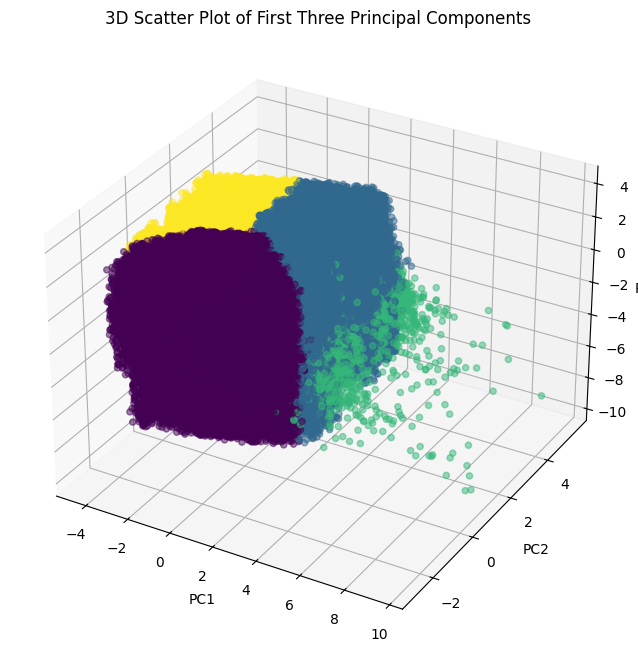

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_df['PC1'], reduced_df['PC2'], reduced_df['PC3'], c=clusters, cmap='viridis', alpha=0.5)
ax.set_title('3D Scatter Plot of First Three Principal Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

3D Scatter Plot (First Three PCA Components):
Purpose: Gives a more detailed view of clustering in 3D space.
Observation:
This visualization better separates overlapping clusters seen in 2D.
Cluster 2 (green) remains sparse, likely representing fewer but larger fire incidents.

Cluster
0       35.351435
1       46.636446
2    13691.884349
3       27.060539
Name: FIRE_SIZE, dtype: float64


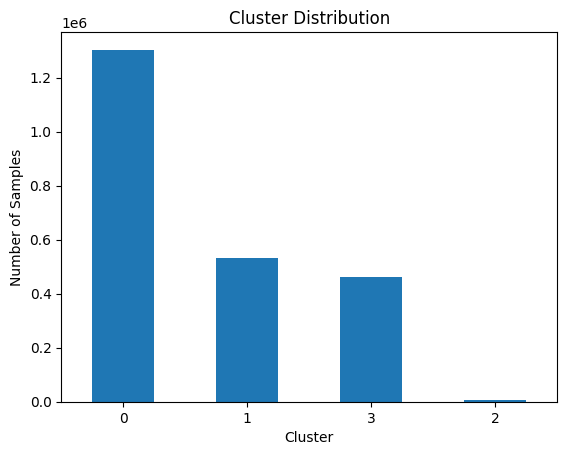

In [ ]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Calculate mean FIRE_SIZE for each cluster
cluster_means = data.groupby('Cluster')['FIRE_SIZE'].mean()
print(cluster_means)

# Visualize cluster distribution
data['Cluster'].value_counts().plot(kind='bar', title='Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.xticks(rotation = 0)
plt.show()


Bar Chart (Cluster Distribution):
Purpose: Shows the size of each cluster.
Observation:
Cluster 0 is the largest and represents the majority of samples (aaprox. 1.2M).
Clusters 1 and 3 are of medium size (approx. equal number of samples).
Cluster 2 is the smallest, likely representing rare but large fires.

**Hierarchical Clustering using dendrograms**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [ ]:
# Subsample the dataset
data_sampled = data.sample(n=10000, random_state=42)  # Adjust sample size as needed

# Select numerical columns for clustering
numerical_cols = ['FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'DISCOVERY_DOY']
data_subset = data_sampled[numerical_cols]

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Compute the linkage matrix
linkage_matrix = linkage(data_scaled, method='ward')

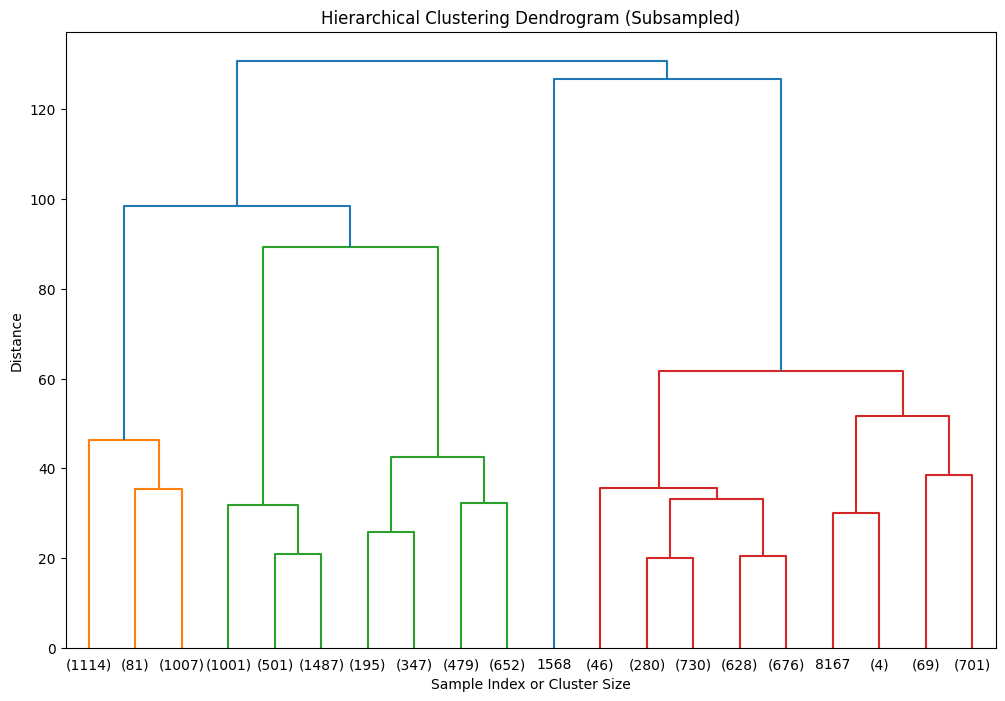

In [ ]:
# Create the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Subsampled)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.xticks(rotation = 0)
plt.show()

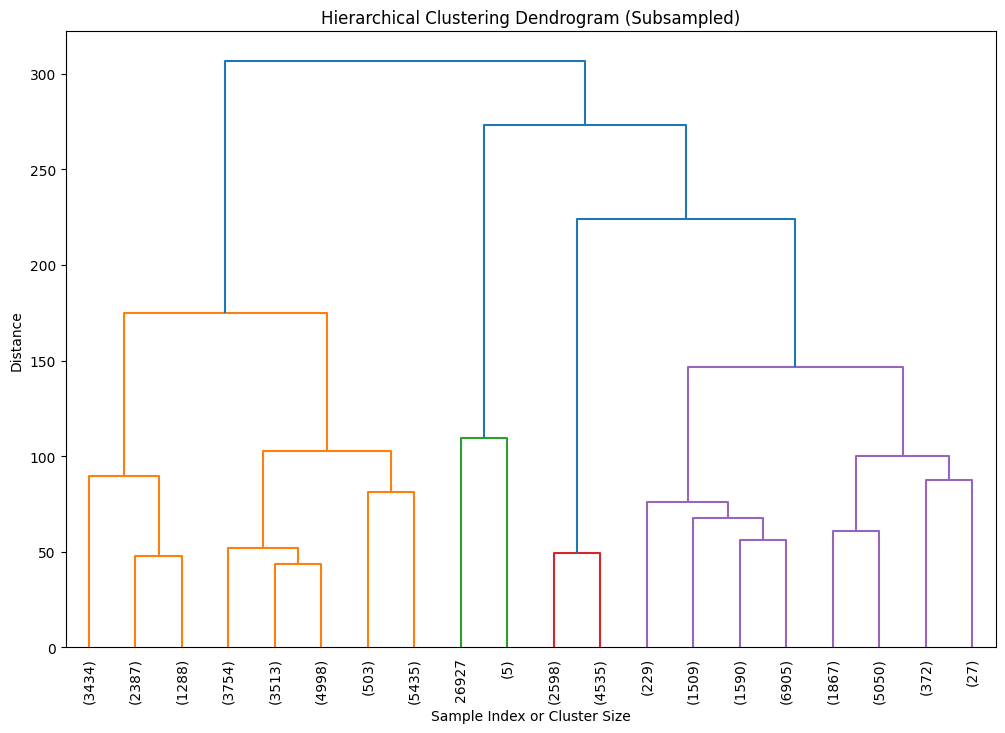

In [ ]:
# Subsample the dataset
data_sampled = data.sample(n=50000, random_state=42)  # Adjust sample size as needed

# Select numerical columns for clustering
numerical_cols = ['FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'DISCOVERY_DOY']
data_subset = data_sampled[numerical_cols]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Compute the linkage matrix
linkage_matrix = linkage(data_scaled, method='ward')

# Create the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Subsampled)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

In [ ]:
#on whole dataset
# Step 1: Select numerical columns for clustering
numerical_cols = ['FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'DISCOVERY_DOY']  # Example features
data_subset = data[numerical_cols]

# Step 2: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Step 3: Compute the linkage matrix
linkage_matrix = linkage(data_scaled, method='ward')  # Ward minimizes variance within clusters

# Step 4: Create the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=None, truncate_mode='lastp', p=20, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

**Feature Engineering**

Steps for Feature Engineering

Date-Based Features:
    Extract components like year, month, day, weekday, and is_weekend from DISCOVERY_DATE.
    Compute the duration of fires using DISCOVERY_DATE and CONT_DATE.

Geographic Features:
    Calculate the average fire size (AVG_FIRE_SIZE) for each state.
    Include the total number of fires for each state.

Fire Severity Categories:
    Classify fires into Small, Medium, and Large based on FIRE_SIZE.

Interaction Features:
    Create derived features like FIRE_SIZE_TO_DURATION (ratio of fire size to duration).

In [ ]:
# Step 1: Date-Based Features
data['DISCOVERY_DATE'] = pd.to_datetime(data['DISCOVERY_DATE'], errors='coerce')
data['CONT_DATE'] = pd.to_datetime(data['CONT_DATE'], errors='coerce')

# Extract year, month, day, and weekday
data['DISCOVERY_YEAR'] = data['DISCOVERY_DATE'].dt.year
data['DISCOVERY_MONTH'] = data['DISCOVERY_DATE'].dt.month
data['DISCOVERY_DAY'] = data['DISCOVERY_DATE'].dt.day
data['DISCOVERY_WEEKDAY'] = data['DISCOVERY_DATE'].dt.weekday  # Monday=0, Sunday=6
data['IS_WEEKEND'] = data['DISCOVERY_WEEKDAY'].apply(lambda x: 1 if x >= 5 else 0)

# Calculate fire duration in days
data['FIRE_DURATION'] = (data['CONT_DATE'] - data['DISCOVERY_DATE']).dt.days

# Step 2: Geographic Features
# Calculate average fire size and total number of fires by state
state_group = data.groupby('STATE')['FIRE_SIZE'].agg(['mean', 'count']).reset_index()
state_group.columns = ['STATE', 'AVG_FIRE_SIZE', 'TOTAL_FIRES']
data = data.merge(state_group, on='STATE', how='left')

# Step 3: Fire Severity Categories
def classify_fire(size):
    if size <= 10:
        return 'Small'
    elif size <= 100:
        return 'Medium'
    else:
        return 'Large'

data['FIRE_SEVERITY'] = data['FIRE_SIZE'].apply(classify_fire)

# Step 4: Interaction Features
# Calculate fire size to duration ratio (add 1 to avoid division by zero)
data['FIRE_SIZE_TO_DURATION'] = data['FIRE_SIZE'] / (data['FIRE_DURATION'] + 1)

# Save the feature-engineered dataset
data.to_csv('feature_engineered_wildfire_dataset.csv', index=False)
print("Feature-engineered dataset saved as 'feature_engineered_wildfire_dataset.csv'.")

Feature-engineered dataset saved as 'feature_engineered_wildfire_dataset.csv'.


In [5]:
feature_engineered_data = pd.read_csv('/content/drive/MyDrive/DM_Project/feature_engineered_wildfire_dataset.csv')

<ipython-input-5-da8f4418f442>:1: DtypeWarning: Columns (7,9,10,11,12,13,14,22,33) have mixed types. Specify dtype option on import or set low_memory=False.
  feature_engineered_data = pd.read_csv('/content/drive/MyDrive/DM_Project/feature_engineered_wildfire_dataset.csv')


In [6]:
feature_engineered_data.head()

,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,...,DISCOVERY_MONTH,DISCOVERY_SEASON,FIRE_DURATION,DISCOVERY_DAY,DISCOVERY_WEEKDAY,IS_WEEKEND,AVG_FIRE_SIZE,TOTAL_FIRES,FIRE_SEVERITY,FIRE_SIZE_TO_DURATION
0,1,1,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,PNF-47,...,2,Winter,0.0,2,2,0,83.082573,251881,Small,0.100000
1,2,2,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,...,5,Spring,0.0,12,2,0,83.082573,251881,Small,0.250000
2,3,3,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,021,...,5,Spring,0.0,31,0,0,83.082573,251881,Small,0.100000
3,4,4,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,6,...,6,Summer,5.0,28,0,0,83.082573,251881,Small,0.016667
4,5,5,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,7,...,6,Summer,5.0,28,0,0,83.082573,251881,Small,0.016667


In [7]:
feature_engineered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 45 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   OBJECTID                      int64  
 1   FOD_ID                        int64  
 2   SOURCE_SYSTEM_TYPE            object 
 3   SOURCE_SYSTEM                 object 
 4   NWCG_REPORTING_AGENCY         object 
 5   NWCG_REPORTING_UNIT_ID        object 
 6   NWCG_REPORTING_UNIT_NAME      object 
 7   SOURCE_REPORTING_UNIT         object 
 8   SOURCE_REPORTING_UNIT_NAME    object 
 9   LOCAL_INCIDENT_ID             object 
 10  FIRE_CODE                     object 
 11  FIRE_NAME                     object 
 12  ICS_209_PLUS_COMPLEX_JOIN_ID  object 
 13  MTBS_FIRE_NAME                object 
 14  COMPLEX_NAME                  object 
 15  FIRE_YEAR                     int64  
 16  DISCOVERY_DATE                object 
 17  DISCOVERY_DOY                 int64  
 18  DISCOVERY_TIME        

**Performing EDA**

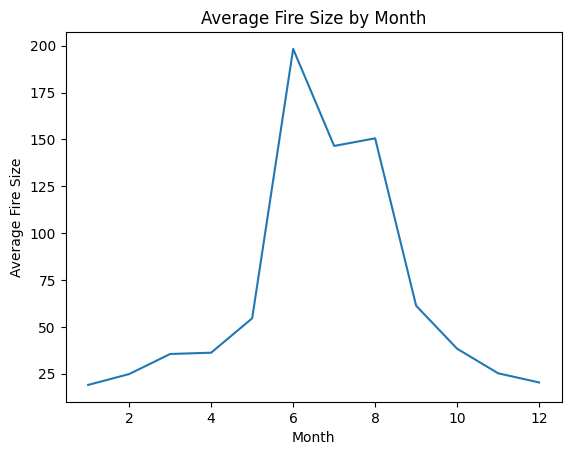

In [ ]:
data.groupby('DISCOVERY_MONTH')['FIRE_SIZE'].mean().plot(kind='line')
plt.title('Average Fire Size by Month')
plt.xlabel('Month')
plt.ylabel('Average Fire Size')
plt.show()

In [ ]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics for Numerical Features:")
print(feature_engineered_data.describe())

# Descriptive statistics for categorical columns
categorical_cols = ['FIRE_SEVERITY', 'STATE', 'NWCG_CAUSE_CLASSIFICATION']
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(feature_engineered_data[col].value_counts())

Descriptive Statistics for Numerical Features:
           OBJECTID        FOD_ID     FIRE_YEAR  DISCOVERY_DOY  \
count  2.303566e+06  2.303566e+06  2.303566e+06   2.303566e+06   
mean   1.151784e+06  1.185100e+08  2.006167e+03   1.659714e+02   
std    6.649824e+05  1.621564e+08  8.044358e+00   8.975278e+01   
min    1.000000e+00  1.000000e+00  1.992000e+03   1.000000e+00   
25%    5.758922e+05  6.225492e+05  2.000000e+03   9.100000e+01   
50%    1.151784e+06  1.403630e+06  2.006000e+03   1.660000e+02   
75%    1.727675e+06  3.000071e+08  2.013000e+03   2.310000e+02   
max    2.303566e+06  4.007330e+08  2.020000e+03   3.660000e+02   

       DISCOVERY_TIME      CONT_DOY     CONT_TIME     FIRE_SIZE      LATITUDE  \
count    2.303566e+06  2.303566e+06  2.303566e+06  2.303566e+06  2.303566e+06   
mean     1.445252e+03  1.707579e+02  1.523731e+03  7.816088e+01  3.696623e+01   
std      3.448999e+02  6.745983e+01  3.367530e+02  2.630832e+03  6.008260e+00   
min      0.000000e+00  1.000000e+0

In [16]:
# Generate descriptive statistics
descriptive_stats = feature_engineered_data.describe(include='all')
descriptive_stats

,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,...,DISCOVERY_MONTH,DISCOVERY_SEASON,FIRE_DURATION,DISCOVERY_DAY,DISCOVERY_WEEKDAY,IS_WEEKEND,AVG_FIRE_SIZE,TOTAL_FIRES,FIRE_SEVERITY,FIRE_SIZE_TO_DURATION
count,2.303566e+06,2.303566e+06,2303566,2303566,2303566,2303566,2303566,2303566,2303566,1559155,...,2.303566e+06,2303566,1.408753e+06,2.303566e+06,2.303566e+06,2.303566e+06,2.303566e+06,2.303566e+06,2303566,1.408753e+06
unique,NaN,NaN,3,41,12,2143,2105,6412,5203,962416,...,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NONFED,ST-NASF,ST/C&L,USGAGAS,Georgia Forestry Commission,GAGAS,Georgia Forestry Commission,001,...,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,Small,NaN
freq,NaN,NaN,1706587,1054112,1728168,183063,183063,113791,113791,4035,...,NaN,773202,NaN,NaN,NaN,NaN,NaN,NaN,2021024,NaN
mean,1.151784e+06,1.185100e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.970532e+00,NaN,9.241024e-01,1.551606e+01,3.050358e+00,3.064175e-01,7.816088e+01,1.030323e+05,NaN,1.918051e+01
std,6.649824e+05,1.621564e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.945058e+00,NaN,6.431854e+00,8.809413e+00,2.021805e+00,4.610053e-01,2.072635e+02,7.402985e+04,NaN,5.604925e+02
min,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,NaN,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.734940e-01,8.300000e+01,NaN,8.130081e-07
25%,5.758922e+05,6.225492e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000e+00,NaN,0.000000e+00,8.000000e+00,1.000000e+00,0.000000e+00,9.534451e+00,3.819100e+04,NaN,1.000000e-01
50%,1.151784e+06,1.403630e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000e+00,NaN,0.000000e+00,1.500000e+01,3.000000e+00,0.000000e+00,4.903509e+01,8.470600e+04,NaN,5.000000e-01
75%,1.727675e+06,3.000071e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000e+00,NaN,0.000000e+00,2.300000e+01,5.000000e+00,1.000000e+00,8.308257e+01,1.800870e+05,NaN,2.500000e+00


In [17]:
desc_stats = data.describe(include = 'all')
desc_stats

,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,...,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_SEASON,FIRE_DURATION
count,2.303566e+06,2.303566e+06,2303566,2303566,2303566,2303566,2303566,2303566,2303566,1559155,...,2.303566e+06,2.303566e+06,2303566,2303566,2303566,1.637787e+06,1637786,2.303566e+06,2303566,2.303566e+06
unique,NaN,NaN,3,41,12,2143,2105,6412,5203,962416,...,NaN,NaN,17,52,4127,NaN,1805,NaN,4,NaN
top,NaN,NaN,NONFED,ST-NASF,ST/C&L,USGAGAS,Georgia Forestry Commission,GAGAS,Georgia Forestry Commission,001,...,NaN,NaN,MISSING/NOT SPECIFIED,CA,Unknown,NaN,Riverside County,NaN,Spring,NaN
freq,NaN,NaN,1706587,1054112,1728168,183063,183063,113791,113791,4035,...,NaN,NaN,1068424,251881,665779,NaN,17159,NaN,773202,NaN
mean,1.151784e+06,1.185100e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.696623e+01,-9.635792e+01,NaN,NaN,NaN,2.741364e+04,NaN,5.970532e+00,NaN,9.241024e-01
std,6.649824e+05,1.621564e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.008260e+00,1.664360e+01,NaN,NaN,NaN,1.694484e+04,NaN,2.945058e+00,NaN,5.029829e+00
min,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.793972e+01,-1.788026e+02,NaN,NaN,NaN,1.001000e+03,NaN,1.000000e+00,NaN,0.000000e+00
25%,5.758922e+05,6.225492e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.301390e+01,-1.110361e+02,NaN,NaN,NaN,1.210100e+04,NaN,4.000000e+00,NaN,0.000000e+00
50%,1.151784e+06,1.403630e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.572250e+01,-9.347009e+01,NaN,NaN,NaN,2.808500e+04,NaN,6.000000e+00,NaN,0.000000e+00
75%,1.727675e+06,3.000071e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.089029e+01,-8.251000e+01,NaN,NaN,NaN,4.500100e+04,NaN,8.000000e+00,NaN,9.241024e-01


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 37 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   OBJECTID                      int64  
 1   FOD_ID                        int64  
 2   SOURCE_SYSTEM_TYPE            object 
 3   SOURCE_SYSTEM                 object 
 4   NWCG_REPORTING_AGENCY         object 
 5   NWCG_REPORTING_UNIT_ID        object 
 6   NWCG_REPORTING_UNIT_NAME      object 
 7   SOURCE_REPORTING_UNIT         object 
 8   SOURCE_REPORTING_UNIT_NAME    object 
 9   LOCAL_INCIDENT_ID             object 
 10  FIRE_CODE                     object 
 11  FIRE_NAME                     object 
 12  ICS_209_PLUS_COMPLEX_JOIN_ID  object 
 13  MTBS_FIRE_NAME                object 
 14  COMPLEX_NAME                  object 
 15  FIRE_YEAR                     int64  
 16  DISCOVERY_DATE                object 
 17  DISCOVERY_DOY                 int64  
 18  DISCOVERY_TIME        

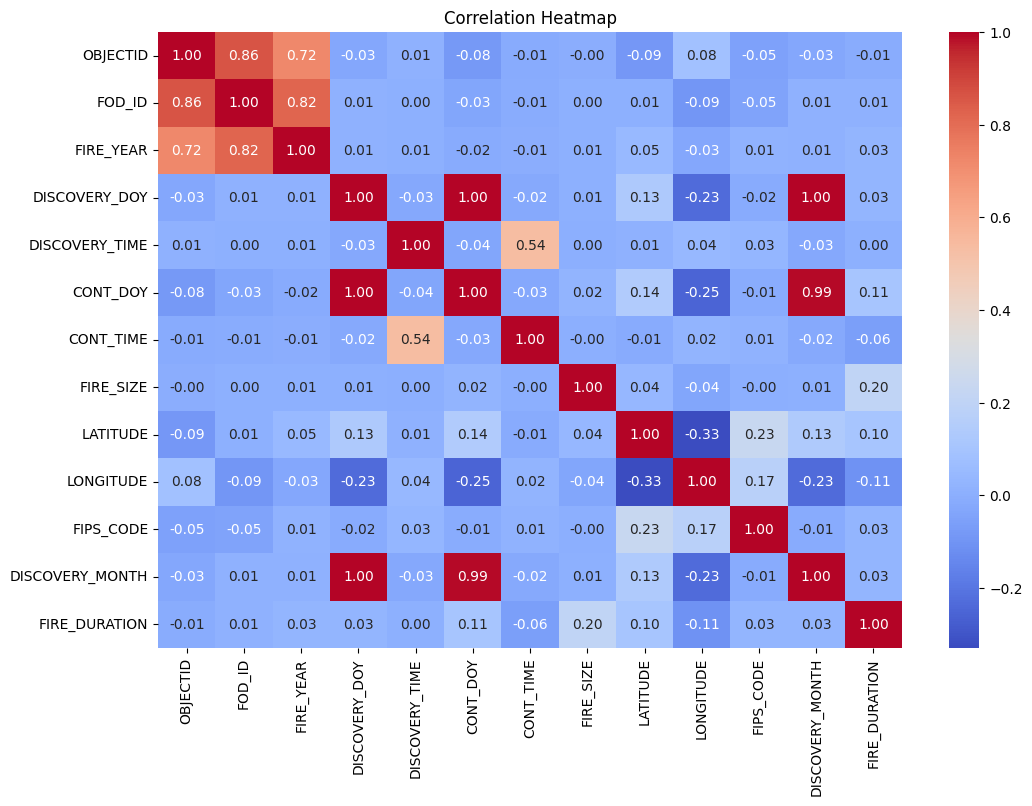

In [23]:
# Data visualization: Correlation heatmap for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=correlation_matrix.isnull())
plt.title('Correlation Heatmap')
plt.show()

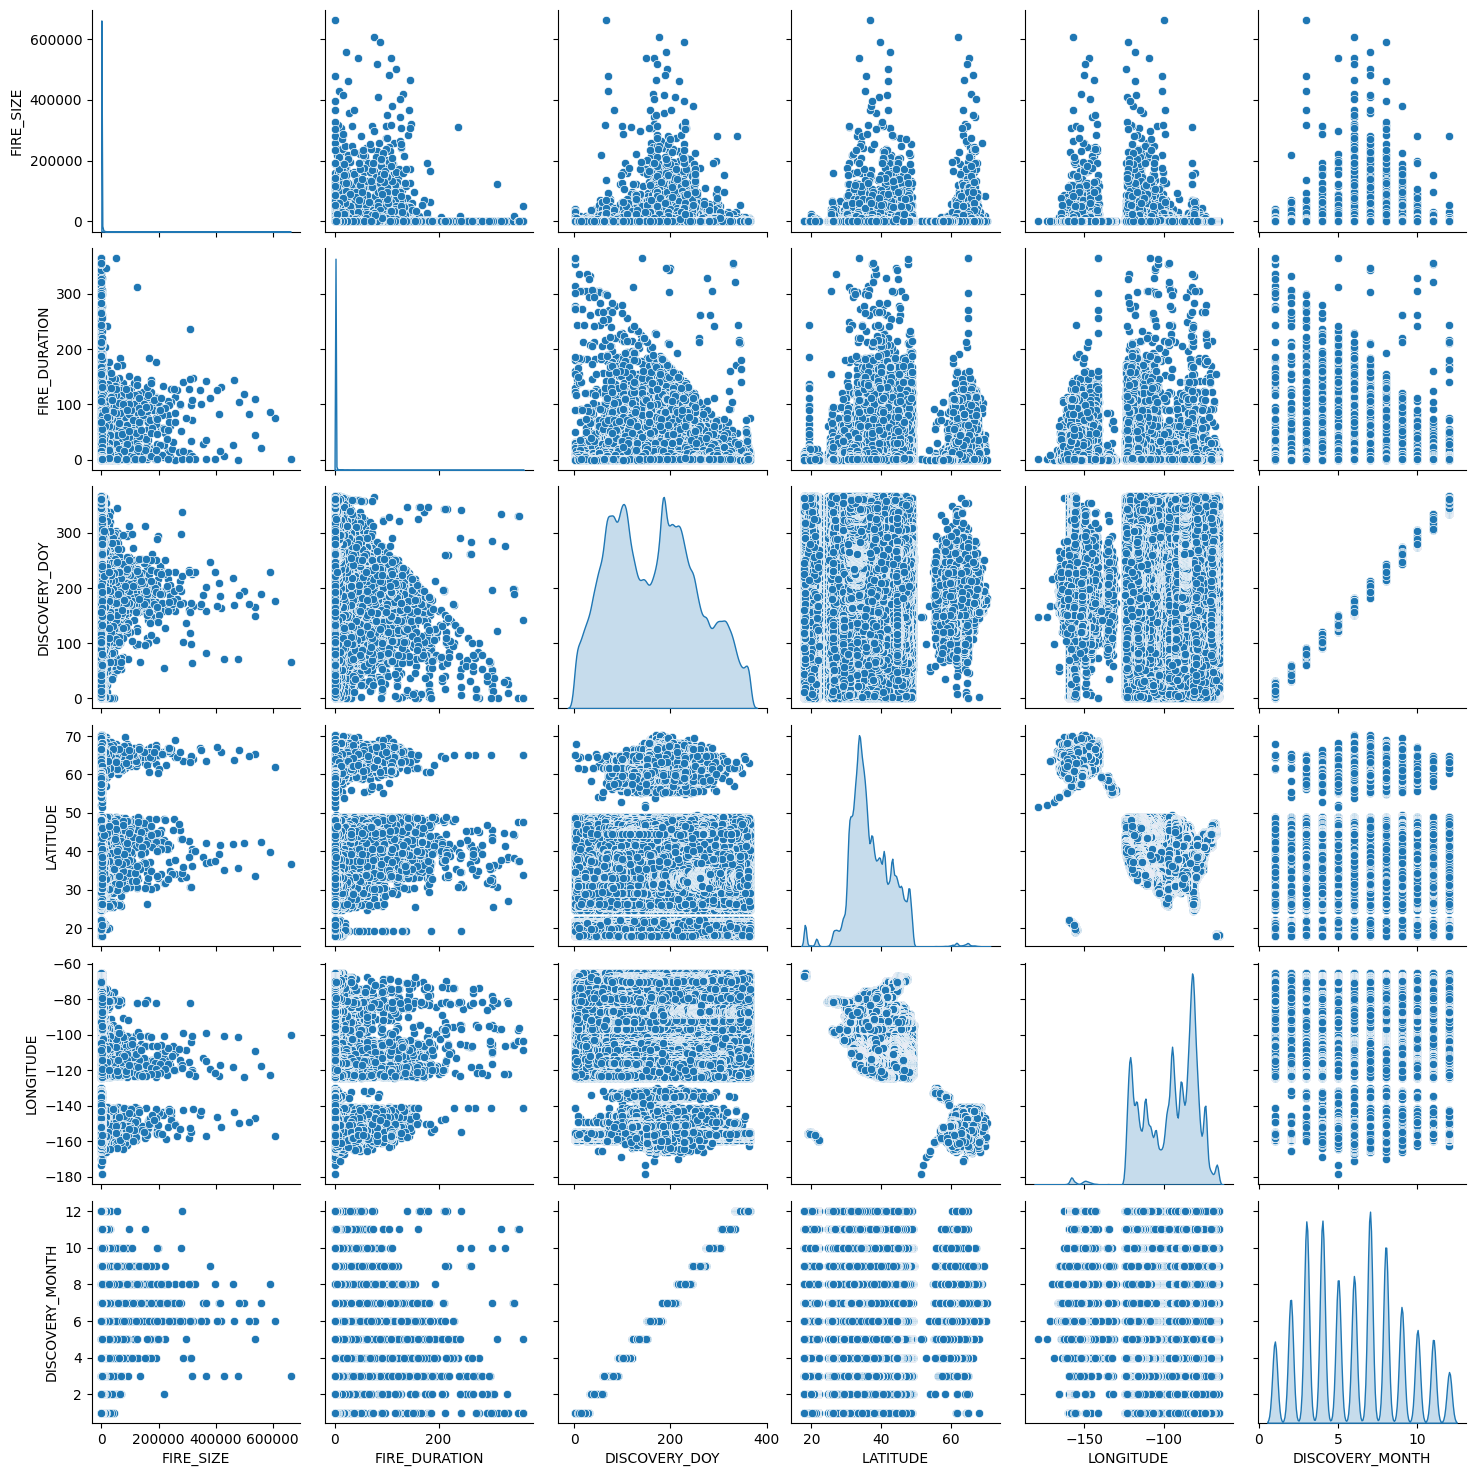

In [22]:
# Pairplot of selected features for correlation analysis
selected_features = ['FIRE_SIZE', 'FIRE_DURATION', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', 'DISCOVERY_MONTH']
sns.pairplot(data[selected_features], diag_kind='kde')
plt.show()

**Computing Correlations**

In [ ]:
import seaborn as sns

Correlation Matrix:
                FIRE_SIZE  DISCOVERY_TIME  LATITUDE  LONGITUDE  FIRE_DURATION
FIRE_SIZE        1.000000        0.000619  0.035736  -0.037665       0.215977
DISCOVERY_TIME   0.000619        1.000000  0.012360   0.042901       0.005163
LATITUDE         0.035736        0.012360  1.000000  -0.328763       0.138903
LONGITUDE       -0.037665        0.042901 -0.328763   1.000000      -0.136256
FIRE_DURATION    0.215977        0.005163  0.138903  -0.136256       1.000000


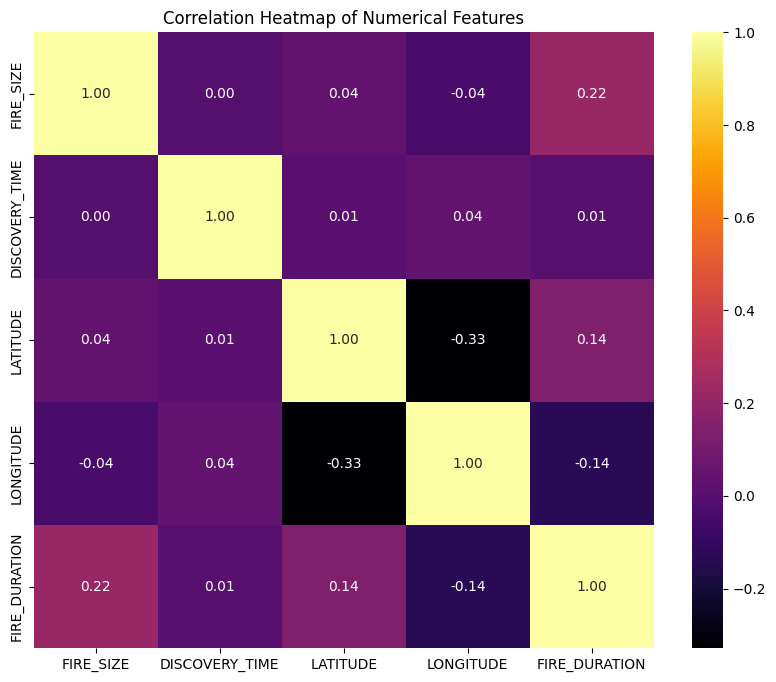

In [ ]:
# Select numerical features for correlation analysis
numerical_features = ['FIRE_SIZE', 'DISCOVERY_TIME', 'LATITUDE', 'LONGITUDE', 'FIRE_DURATION']

# Compute the correlation matrix
correlation_matrix = feature_engineered_data[numerical_features].corr()

# Print correlation values
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="inferno", cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Correlations with FIRE_SIZE
fire_size_corr = correlation_matrix['FIRE_SIZE']
print("\nCorrelations with FIRE_SIZE:")
print(fire_size_corr.sort_values(ascending=False))


Correlations with FIRE_SIZE:
FIRE_SIZE         1.000000
FIRE_DURATION     0.215977
LATITUDE          0.035736
DISCOVERY_TIME    0.000619
LONGITUDE        -0.037665
Name: FIRE_SIZE, dtype: float64


**GMM Clustering**

In [ ]:
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

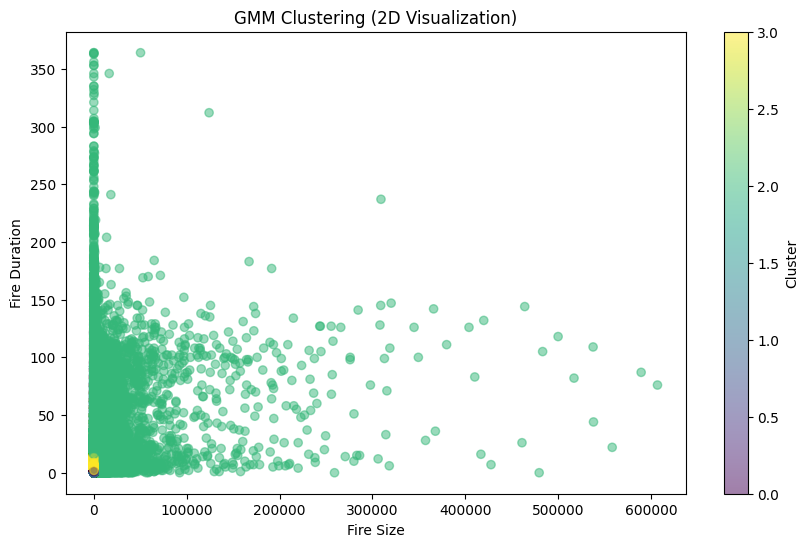

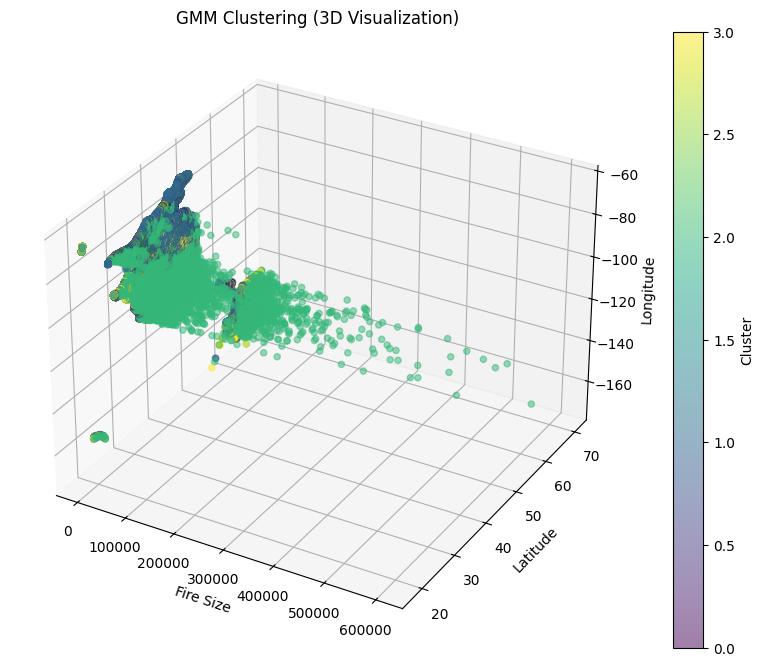

In [ ]:
# Step 1: Select and Standardize Features
features = ['FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'FIRE_DURATION']
data_subset = feature_engineered_data[features].dropna()  # Remove any remaining NaNs
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Step 2: Perform GMM Clustering
n_clusters = 4  # Choose the number of clusters
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(data_scaled)
data_subset['Cluster'] = gmm.predict(data_scaled)

# Step 3: Visualize Clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(data_subset['FIRE_SIZE'], data_subset['FIRE_DURATION'], c=data_subset['Cluster'], cmap='viridis', alpha=0.5)
plt.title('GMM Clustering (2D Visualization)')
plt.xlabel('Fire Size')
plt.ylabel('Fire Duration')
plt.colorbar(label='Cluster')
plt.show()

# Step 4: Visualize Clusters in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data_subset['FIRE_SIZE'], data_subset['LATITUDE'], data_subset['LONGITUDE'],
    c=data_subset['Cluster'], cmap='viridis', alpha=0.5
)
ax.set_title('GMM Clustering (3D Visualization)')
ax.set_xlabel('Fire Size')
ax.set_ylabel('Latitude')
ax.set_zlabel('Longitude')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils import resample

# Load the dataset (replace 'dataset.csv' with your actual file)
dataset = pd.read_csv('/content/cleaned_wildfire_dataset.csv')

# Ensure the dataset has a target column for balancing (replace 'FIRE_SIZE_CLASS' with actual column name)
target_column = 'FIRE_SIZE_CLASS'

# Get the unique classes and the minimum class size
classes = dataset[target_column].unique()
min_class_size = dataset[target_column].value_counts().min()

# Downsample each class to balance the dataset
balanced_data = pd.DataFrame()
for cls in classes:
    class_subset = dataset[dataset[target_column] == cls]
    downsampled = resample(class_subset,
                           replace=False,
                           n_samples=min_class_size,
                           random_state=42)
    balanced_data = pd.concat([balanced_data, downsampled])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the balanced dataset into train, validation, and test sets
X = balanced_data.drop(columns=[target_column])
y = balanced_data[target_column]

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Validation-test split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Save the splits to CSV files
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Data split completed for the entire US. Train, validation, and test datasets saved.")


<ipython-input-2-7f6e44b53f73>:7: DtypeWarning: Columns (7,9,10,11,12,13,14,22,33) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/cleaned_wildfire_dataset.csv')


Data split completed for the entire US. Train, validation, and test datasets saved.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace 'dataset.csv' with your actual file)
dataset = pd.read_csv('/content/cleaned_wildfire_dataset.csv')

# Ensure the dataset has a target column for balancing (replace 'FIRE_SIZE_CLASS' with actual column name)
target_column = 'FIRE_SIZE_CLASS'

# Handle missing values by imputing with the mean (numerical) or most frequent (categorical)
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns

# Impute missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

dataset[numerical_columns] = imputer_num.fit_transform(dataset[numerical_columns])
dataset[categorical_columns] = imputer_cat.fit_transform(dataset[categorical_columns])

# Encode categorical features
label_encoders = {}
for col in categorical_columns:
    dataset[col] = dataset[col].astype(str)  # Convert all categorical columns to strings
    label_encoders[col] = LabelEncoder()
    dataset[col] = label_encoders[col].fit_transform(dataset[col])

# Get the unique classes and the minimum class size
classes = dataset[target_column].unique()
min_class_size = dataset[target_column].value_counts().min()

# Downsample each class to balance the dataset
balanced_data = pd.DataFrame()
for cls in classes:
    class_subset = dataset[dataset[target_column] == cls]
    downsampled = resample(class_subset,
                           replace=False,
                           n_samples=min_class_size,
                           random_state=42)
    balanced_data = pd.concat([balanced_data, downsampled])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the balanced dataset into train, validation, and test sets
X = balanced_data.drop(columns=[target_column])
y = balanced_data[target_column]

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Validation-test split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Save the splits to CSV files
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Data split completed for the entire US. Train, validation, and test datasets saved.")

# Random Forest Classifier
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_y_val_pred)
print(f"Validation Accuracy for Random Forest: {rf_accuracy:.4f}")
print(classification_report(y_val, rf_y_val_pred))

# Support Vector Machine Classifier
print("\nTraining SVM...")
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_y_val_pred = svm_model.predict(X_val)
svm_accuracy = accuracy_score(y_val, svm_y_val_pred)
print(f"Validation Accuracy for SVM: {svm_accuracy:.4f}")
print(classification_report(y_val, svm_y_val_pred))

# K-Nearest Neighbors Classifier
print("\nTraining K-Nearest Neighbors...")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)
knn_accuracy = accuracy_score(y_val, knn_y_val_pred)
print(f"Validation Accuracy for K-Nearest Neighbors: {knn_accuracy:.4f}")
print(classification_report(y_val, knn_y_val_pred))

# Logistic Regression Classifier
print("\nTraining Logistic Regression...")
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
log_reg_y_val_pred = log_reg_model.predict(X_val)
log_reg_accuracy = accuracy_score(y_val, log_reg_y_val_pred)
print(f"Validation Accuracy for Logistic Regression: {log_reg_accuracy:.4f}")
print(classification_report(y_val, log_reg_y_val_pred))

print("Model training and evaluation completed.")


<ipython-input-8-b6842b3432cc>:14: DtypeWarning: Columns (7,9,10,11,12,13,14,22,33) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/cleaned_wildfire_dataset.csv')


Data split completed for the entire US. Train, validation, and test datasets saved.

Training Random Forest...
Validation Accuracy for Random Forest: 0.9884
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       478
           1       1.00      0.99      1.00       478
           2       0.99      0.99      0.99       478
           3       0.98      1.00      0.99       479
           4       0.98      0.98      0.98       478
           5       0.97      0.98      0.98       478
           6       1.00      0.98      0.99       479

    accuracy                           0.99      3348
   macro avg       0.99      0.99      0.99      3348
weighted avg       0.99      0.99      0.99      3348


Training SVM...
Validation Accuracy for SVM: 0.1655
              precision    recall  f1-score   support

           0       0.18      0.22      0.20       478
           1       0.00      0.00      0.00       478
           2       0.16      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Accuracy for K-Nearest Neighbors: 0.3280
              precision    recall  f1-score   support

           0       0.34      0.48      0.40       478
           1       0.30      0.34      0.32       478
           2       0.32      0.33      0.33       478
           3       0.22      0.20      0.21       479
           4       0.23      0.21      0.22       478
           5       0.31      0.30      0.30       478
           6       0.68      0.43      0.53       479

    accuracy                           0.33      3348
   macro avg       0.34      0.33      0.33      3348
weighted avg       0.34      0.33      0.33      3348


Training Logistic Regression...
Validation Accuracy for Logistic Regression: 0.2407
              precision    recall  f1-score   support

           0       0.22      0.30      0.25       478
           1       0.22      0.20      0.21       478
           2       0.19      0.25      0.22       478
           3       0.13      0.07      0.09      

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset (replace 'dataset.csv' with your actual file)
dataset = pd.read_csv('/content/cleaned_wildfire_dataset.csv')

# Ensure the dataset has a target column for balancing (replace 'FIRE_SIZE_CLASS' with actual column name)
target_column = 'FIRE_SIZE_CLASS'

# Handle missing values by imputing with the mean (numerical) or most frequent (categorical)
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns

# Impute missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

dataset[numerical_columns] = imputer_num.fit_transform(dataset[numerical_columns])
dataset[categorical_columns] = imputer_cat.fit_transform(dataset[categorical_columns])

# Encode categorical features
label_encoders = {}
for col in categorical_columns:
    dataset[col] = dataset[col].astype(str)  # Convert all categorical columns to strings
    label_encoders[col] = LabelEncoder()
    dataset[col] = label_encoders[col].fit_transform(dataset[col])

# Get the unique classes and the minimum class size
classes = dataset[target_column].unique()
min_class_size = dataset[target_column].value_counts().min()

# Downsample each class to balance the dataset
balanced_data = pd.DataFrame()
for cls in classes:
    class_subset = dataset[dataset[target_column] == cls]
    downsampled = resample(class_subset,
                           replace=False,
                           n_samples=min_class_size,
                           random_state=42)
    balanced_data = pd.concat([balanced_data, downsampled])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the balanced dataset into train, validation, and test sets
X = balanced_data.drop(columns=[target_column])
y = balanced_data[target_column]

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Validation-test split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Save the splits to CSV files
pd.DataFrame(X_train).to_csv('X_train.csv', index=False)
pd.DataFrame(X_val).to_csv('X_val.csv', index=False)
pd.DataFrame(X_test).to_csv('X_test.csv', index=False)
pd.Series(y_train).to_csv('y_train.csv', index=False)
pd.Series(y_val).to_csv('y_val.csv', index=False)
pd.Series(y_test).to_csv('y_test.csv', index=False)

print("Data split completed for the entire US. Train, validation, and test datasets saved.")

# Random Forest Classifier with Hyperparameter Tuning
print("\nTraining Random Forest...")
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3)
rf_model.fit(X_train, y_train)
rf_best = rf_model.best_estimator_
rf_y_val_pred = rf_best.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_y_val_pred)
print(f"Validation Accuracy for Random Forest: {rf_accuracy:.4f}")
print(classification_report(y_val, rf_y_val_pred))

# Evaluate Random Forest on Test Set
rf_y_test_pred = rf_best.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_y_test_pred)
print(f"Test Accuracy for Random Forest: {rf_test_accuracy:.4f}")
print(classification_report(y_test, rf_y_test_pred))

# Support Vector Machine Classifier with Hyperparameter Tuning
print("\nTraining SVM...")
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=3)
svm_model.fit(X_train, y_train)
svm_best = svm_model.best_estimator_
svm_y_val_pred = svm_best.predict(X_val)
svm_accuracy = accuracy_score(y_val, svm_y_val_pred)
print(f"Validation Accuracy for SVM: {svm_accuracy:.4f}")
print(classification_report(y_val, svm_y_val_pred))

# Evaluate SVM on Test Set
svm_y_test_pred = svm_best.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_y_test_pred)
print(f"Test Accuracy for SVM: {svm_test_accuracy:.4f}")
print(classification_report(y_test, svm_y_test_pred))

# XGBoost Classifier with Hyperparameter Tuning
print("\nTraining XGBoost...")
xgb_params = {'n_estimators': [100, 200], 'max_depth': [3, 6, 10]}
xgb_model = GridSearchCV(XGBClassifier(tree_method='hist', random_state=42), xgb_params, cv=3)
xgb_model.fit(X_train, y_train)
xgb_best = xgb_model.best_estimator_
xgb_y_val_pred = xgb_best.predict(X_val)
xgb_accuracy = accuracy_score(y_val, xgb_y_val_pred)
print(f"Validation Accuracy for XGBoost: {xgb_accuracy:.4f}")
print(classification_report(y_val, xgb_y_val_pred))

# Evaluate XGBoost on Test Set
xgb_y_test_pred = xgb_best.predict(X_test)
xgb_test_accuracy = accuracy_score(y_test, xgb_y_test_pred)
print(f"Test Accuracy for XGBoost: {xgb_test_accuracy:.4f}")
print(classification_report(y_test, xgb_y_test_pred))

# Gaussian Naive Bayes Classifier
print("\nTraining Gaussian Naive Bayes...")
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_y_val_pred = gnb_model.predict(X_val)
gnb_accuracy = accuracy_score(y_val, gnb_y_val_pred)
print(f"Validation Accuracy for Gaussian Naive Bayes: {gnb_accuracy:.4f}")
print(classification_report(y_val, gnb_y_val_pred))

# Evaluate Gaussian Naive Bayes on Test Set
gnb_y_test_pred = gnb_model.predict(X_test)
gnb_test_accuracy = accuracy_score(y_test, gnb_y_test_pred)
print(f"Test Accuracy for Gaussian Naive Bayes: {gnb_test_accuracy:.4f}")
print(classification_report(y_test, gnb_y_test_pred))

print("Model training and evaluation completed.")


ParserError: Error tokenizing data. C error: Expected 38 fields in line 8001, saw 40
